# **Task 2 : Titanic Survival Prediction**
## Bharat Intern
* Author : Rithish S
* Domain : Data Science
* Aim : To build a model to predict the survival of  passengers on the titanic using machine learning algorithms.

### Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Data Preprocessing

In [9]:
df.drop(columns=['Cabin','PassengerId','Name'],inplace=True)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
3,1,1,female,35.0,1,0,113803,53.1000,S
268,1,1,female,58.0,0,1,PC 17582,153.4625,S
870,0,3,male,26.0,0,0,349248,7.8958,S
430,1,1,male,28.0,0,0,110564,26.5500,S
348,1,3,male,3.0,1,1,C.A. 37671,15.9000,S


In [10]:
df['Sex'].replace({'male':1,'female':0},inplace=True)
df['Embarked'].replace({'S':1,'C':2,'Q':3},inplace=True)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
201,0,3,1,NaN,8,2,CA. 2343,69.550,1.0
121,0,3,1,NaN,0,0,A4. 54510,8.050,1.0
78,1,2,1,0.83,0,2,248738,29.000,1.0
200,0,3,1,28.00,0,0,345770,9.500,1.0
292,0,2,1,36.00,0,0,SC/Paris 2163,12.875,2.0


In [11]:
df.drop(columns=['Ticket'],inplace=True)

In [12]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
316,1,2,0,24.0,1,0,26.00,1.0
293,0,3,0,24.0,0,0,8.85,1.0
560,0,3,1,NaN,0,0,7.75,3.0
486,1,1,0,35.0,1,0,90.00,1.0
304,0,3,1,NaN,0,0,8.05,1.0


In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.sample(5)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
87,0,3,1,29.699118,0,0,8.0500,1.0
669,1,1,0,29.699118,1,0,52.0000,1.0
806,0,1,1,39.000000,0,0,0.0000,1.0
509,1,3,1,26.000000,0,0,56.4958,1.0
57,0,3,1,28.500000,0,0,7.2292,2.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


### Data Visualization

<Axes: >

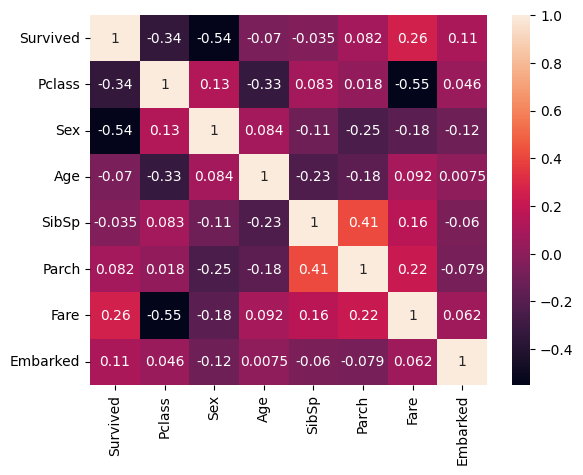

In [16]:
sns.heatmap(df.corr(),annot=True)

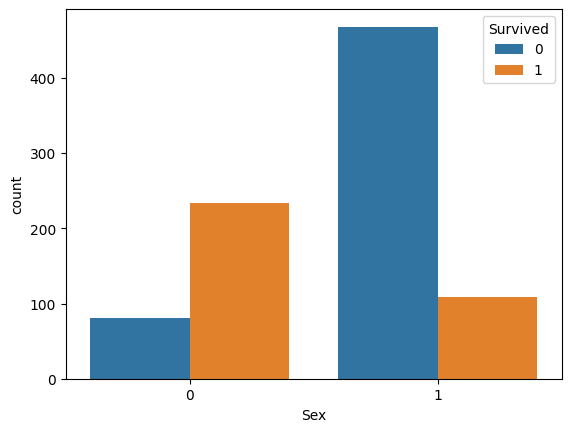

In [17]:
sns.countplot(df,x='Sex',hue='Survived')
plt.show()

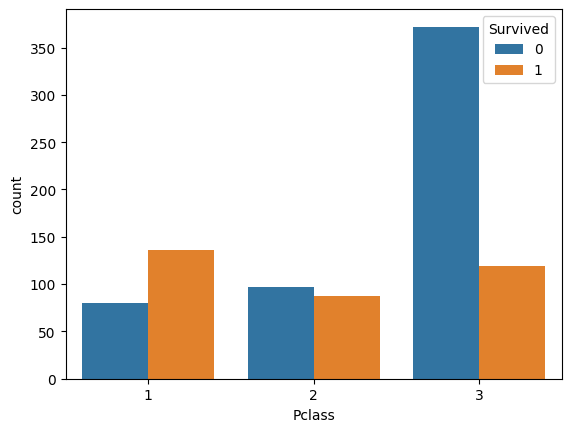

In [18]:
sns.countplot(df,x='Pclass', hue = 'Survived')
plt.show()

### Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
model = LogisticRegression()

In [21]:
X = df.drop(columns=['Survived'])
Y = df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,1.0
1,1,0,38.000000,1,0,71.2833,2.0
2,3,0,26.000000,0,0,7.9250,1.0
3,1,0,35.000000,1,0,53.1000,1.0
4,3,1,35.000000,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,1.0
887,1,0,19.000000,0,0,30.0000,1.0
888,3,0,29.699118,1,2,23.4500,1.0
889,1,1,26.000000,0,0,30.0000,2.0


In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
model.fit(Xtrain, Ytrain)

c:\Users\rithi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction and Accuracy

In [24]:
prediction = model.predict(Xtest)
prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [25]:
print("Accuracy score :",accuracy_score(prediction,Ytest))

Accuracy score : 0.7821229050279329
